# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Assign it to a variable called chipo.

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### See the first 10 entries

In [3]:
df_chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Create a histogram of the top 5 items bought

In [21]:
top_5 = df_chipo.groupby('item_name').count().sort_values('quantity', ascending=False)
top_5 = top_5.head(5)

In [32]:
top_5 = pd.DataFrame(top_5)
top_5.reset_index(inplace=True)

Text(0.5, 1.0, 'top 5 items bought in chiptole')

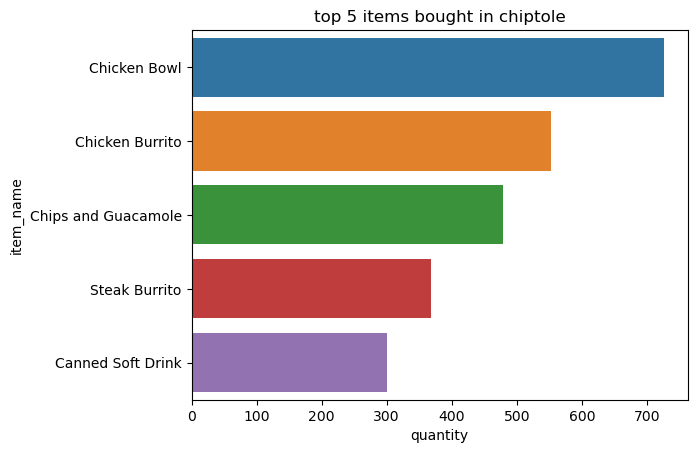

In [36]:
sns.barplot(y=top_5.item_name, x=top_5.quantity, );
plt.title('top 5 items bought in chiptole')

### Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [61]:
df_chipo.item_price = [float(value[1:-1]) for value in df_chipo.item_price]

In [63]:
df_order = df_chipo.groupby('order_id').sum()

In [64]:
df_order

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0.5, 1.0, 'Number of items ordered per order price')

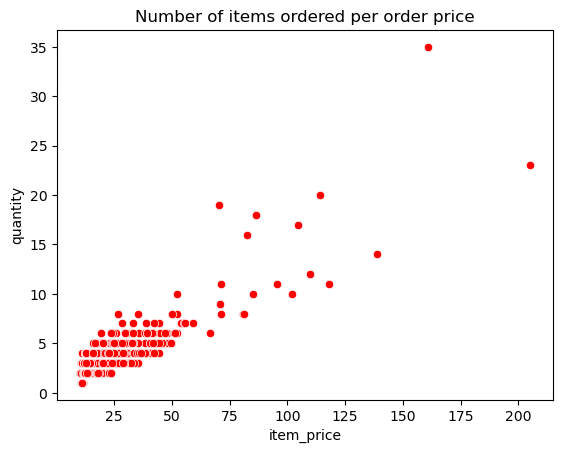

In [71]:
sns.scatterplot(y=df_order.quantity, x=df_order.item_price, color='red')
plt.title('Number of items ordered per order price')

### BONUS: Create a question and a graph to answer your own question.

In [72]:
# Create a histogram of the least 5 items bought

In [106]:
least_5 = df_chipo.groupby('item_name').count().sort_values('quantity', ascending=True)

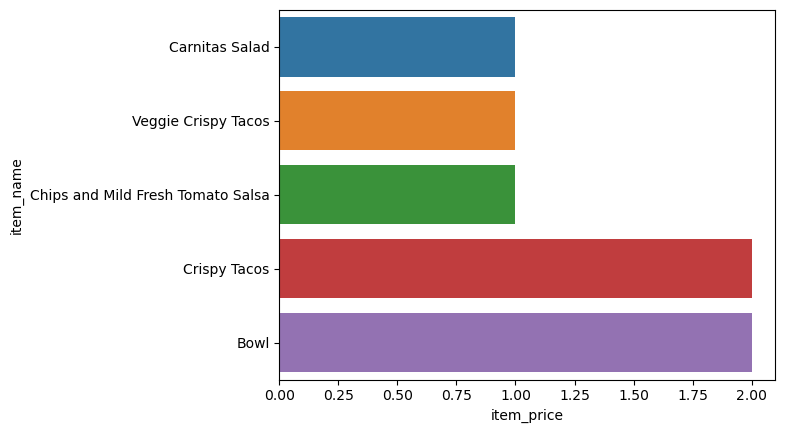

In [140]:
sns.barplot(y=least_5.item_name, x=least_5.item_price, order=least_5.item_name);

In [136]:
least_5 = least_5.set_index('item_name').head(5)

In [137]:
least_5=pd.DataFrame(least_5)

In [138]:
least_5.reset_index(inplace=True)

In [139]:
least_5

,item_name,level_0,index,order_id,quantity,choice_description,item_price
0,Carnitas Salad,0,0,1,1,1,1
1,Veggie Crispy Tacos,1,1,1,1,1,1
2,Chips and Mild Fresh Tomato Salsa,2,2,1,1,0,1
3,Crispy Tacos,3,3,2,2,2,2
4,Bowl,4,4,2,2,2,2
